In [1]:
import networkx as nx
import pandas as pd
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.1.2'

In [2]:
# turn response caching off
ox.config(use_cache=False)

# turn it back on and turn on/off logging to your console
ox.config(use_cache=True, log_console=False)

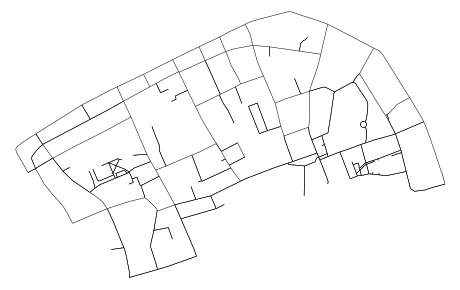

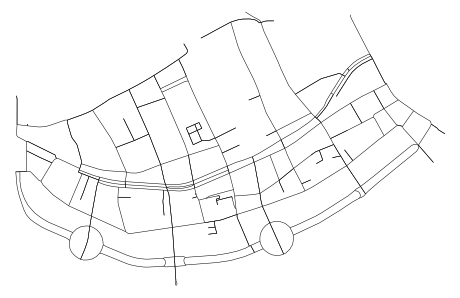

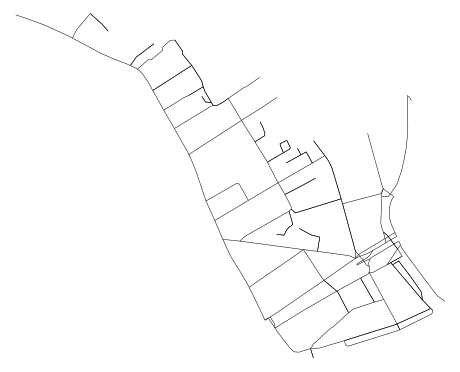

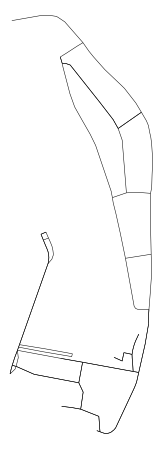

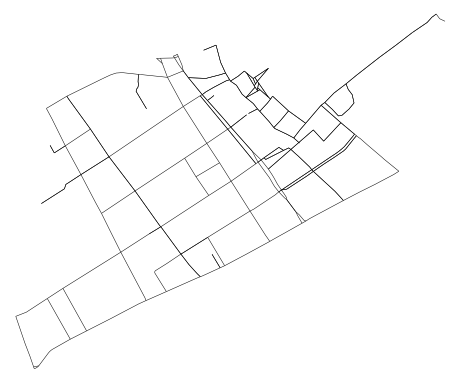

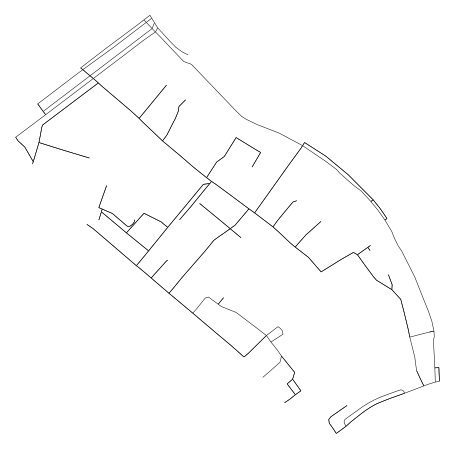

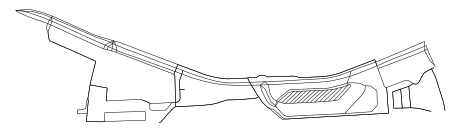

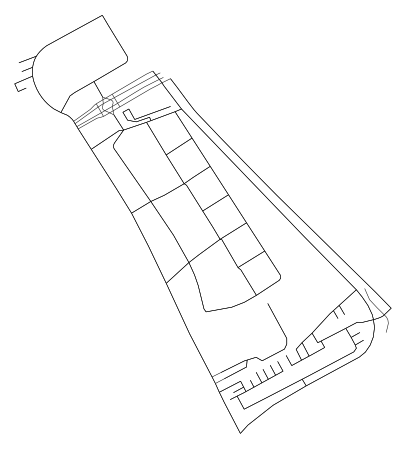

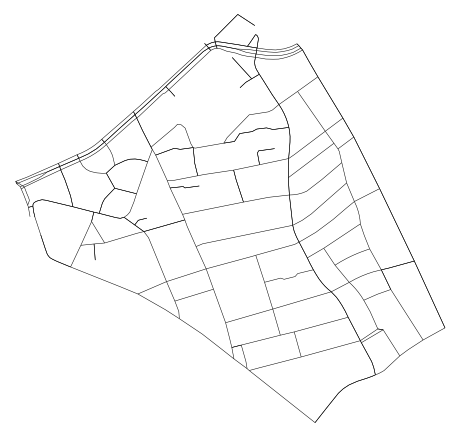

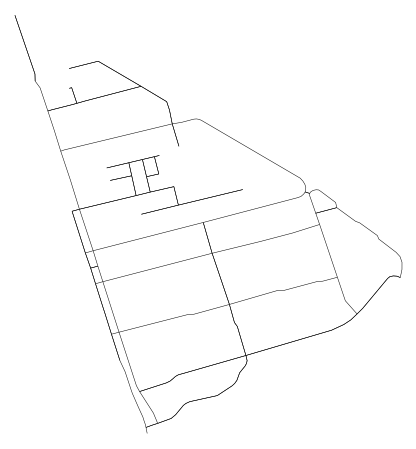

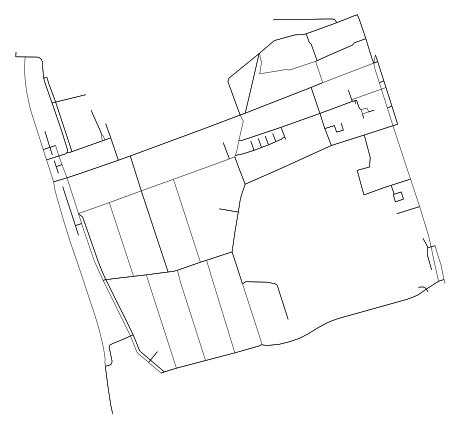

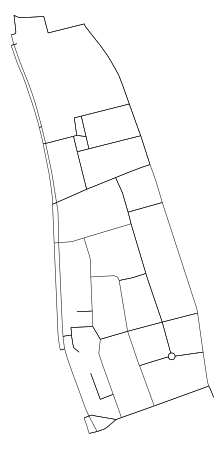

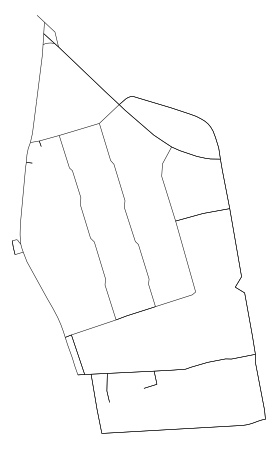

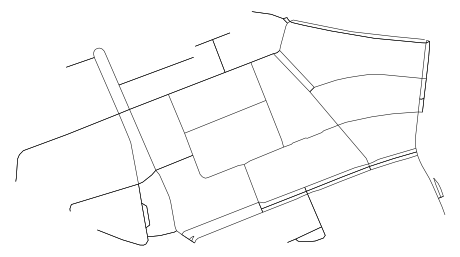

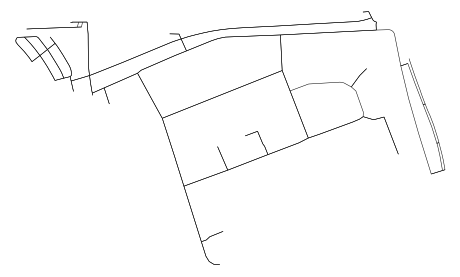

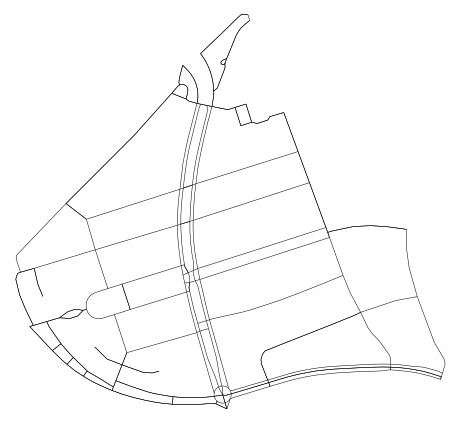

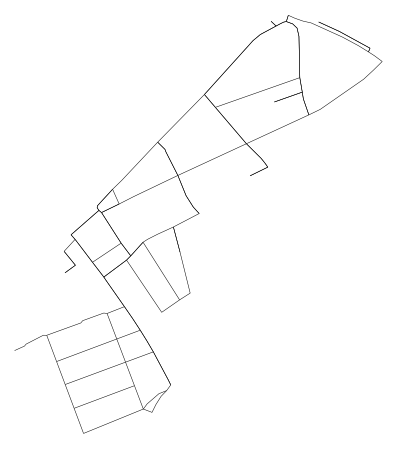

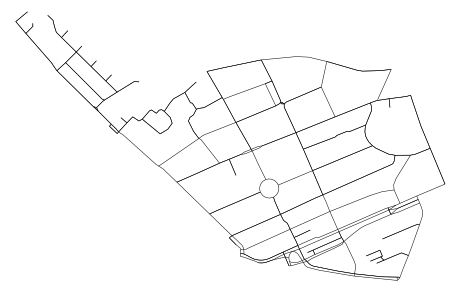

In [4]:
calif = gpd.read_file("input_data/own_sample")
Num = 0
while Num < 18:
    mission_district = calif[calif["Num"] == Num]
    polygon = mission_district["geometry"].iloc[0]
    
    G3 = ox.graph_from_polygon(polygon, network_type="bike", simplify=True)
    fig, ax = ox.plot_graph(G3, bgcolor="w", node_size=0, edge_color="k", edge_linewidth=0.5)
    
    Num = Num +1


In [3]:
calif = gpd.read_file("input_data/own_sample")
stats_joint = pd.DataFrame(columns = ['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'FID'])
Num = 0

while Num < len(calif):
    mission_district = calif[calif["Num"] == Num]
    area = ox.project_gdf(mission_district).unary_union.area
    polygon = mission_district["geometry"].iloc[0]
    
    try:
        G = ox.graph_from_polygon(polygon, network_type="bike", simplify=True)
    except:
        stats_joint.loc[Num, "FID"] = Num
    else:
        stats = ox.basic_stats(G, area=area)
        del stats["streets_per_node_counts"]
        del stats["streets_per_node_proportions"]
        del stats['n']
        del stats['m']
        del stats['k_avg']
        del stats['edge_length_total']
        del stats['edge_length_avg']
        del stats['streets_per_node_avg']
        del stats['self_loop_proportion']
        del stats['node_density_km']
        del stats['edge_density_km']
        del stats['intersection_count']
        del stats['street_length_total']
        del stats['street_segment_count']
        stats_series = pd.Series(stats)
        stats_series["FID"] = Num
        dict_stats = {'net_indices':stats_series.index,'values':stats_series.values}
        df_stats = pd.DataFrame(dict_stats)
        df_stats = df_stats.set_index(keys='net_indices')
        df_stats = df_stats.T
        stats_joint = pd.concat([stats_joint, df_stats], ignore_index = True)
    
    Num = Num+1
    
    
print(stats_joint)
stats_joint.to_excel('stats_joint.xlsx')


       n    m k_avg edge_length_total edge_length_avg streets_per_node_avg  \
0    NaN  NaN   NaN               NaN             NaN                  NaN   
1    NaN  NaN   NaN               NaN             NaN                  NaN   
2    NaN  NaN   NaN               NaN             NaN                  NaN   
3    NaN  NaN   NaN               NaN             NaN                  NaN   
4    NaN  NaN   NaN               NaN             NaN                  NaN   
..   ...  ...   ...               ...             ...                  ...   
245  NaN  NaN   NaN               NaN             NaN                  NaN   
246  NaN  NaN   NaN               NaN             NaN                  NaN   
247  NaN  NaN   NaN               NaN             NaN                  NaN   
248  NaN  NaN   NaN               NaN             NaN                  NaN   
249  NaN  NaN   NaN               NaN             NaN                  NaN   

    intersection_count street_length_total street_segment_count

In [5]:
print(stats_series.index)

Index(['intersection_count', 'street_length_total', 'street_segment_count',
       'street_length_avg', 'circuity_avg', 'intersection_density_km',
       'street_density_km', 'FID'],
      dtype='object')


In [ ]:
help(pd.contact)